# Analyzing Electric Vehicle Charging Patterns and Infrastructure in Germany 

This data science project explored the availability and usage patterns of electric vehicle (EV) charging facilities in Germany. The project aims to obtain essential insights into EV charging behaviour, determine usage patterns, and examine the existing charging infrastructure. The analysis seeks to provide significant findings and recommendations for improving the EV charging ecosystem by leveraging statistical or machine-learning methodologies. 

The project collects data from two primary sources: the Electric Charging Station dataset and the E-Ladesäulenregister dataset. These datasets contain information about charging station operators, types of charging facilities, power capacity, location details, and operational dates. 

The question that interests us is: 
- What are the usage patterns of electric vehicle charging stations in Germany?
- How does the number of charging points and power capacity vary across different types of charging stations?
- Which areas in Germany have the highest concentration of charging stations, and which areas have limited coverage?
- Are there specific types of charging stations that are more prevalent in certain regions or urban areas?

## Install dependencies
Initially, install all required dependencies.

In [1]:
%pip install pandas
%pip install plotly
%pip install 'SQLAlchemy==1.4.46'
%pip install nbformat
%pip install pysqlite
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 3.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 5.4 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Created wheel for SQLAlchemy: filename=SQLAlchemy-1.4.46-cp39-cp39-macosx_10_9_x86_64.whl size=1559694 sha256=896f51855f881b7f23930ed0881756b4e59f77d006d2a929f7a978c01bce47e9
  Stored in directory: /Users/hasan/Library/Caches/pip/wheels/3c/99/65/57cf5a0ec6e7f3b803a68d31694501e168997e03e80adc903d
Successfully built SQLAlchemy
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.15
    Uninstalling SQLAlchemy-2.0.15:
      Successfully uninstalled SQLAlchemy-2.0.15
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 1.2 MB/s eta 0:00:00a 0

## Data Sources

#### Datasource 1: Electric Charging Station
- Metadata URL: [Link to Metadata](https://mobilithek.info/offers/-2989425250318611078)
- Data URL: [Link to Data](https://opendata.rhein-kreis-neuss.de/api/v2/catalog/datasets/rhein-kreis-neuss-ladesaulen-in-deutschland/exports/csv)
- Data Type: CSV

This data source provides information on electric charging stations in Germany. The metadata URL contains additional details about the dataset, including its source and description. The data can be accessed using the provided data URL, which leads to a CSV file. The dataset contains relevant information about the charging stations, such as the operator, type of charging facility, number of charging points, power capacity, plug types, location details, and operational dates.

#### Datasource 2: E-Ladesäulenregister
- Metadata URL: [Link to Metadata](https://www.govdata.de/web/guest/daten/-/details/e-ladesaulenregister)
- Data URL: [Link to Data](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/E_Mobilitaet/Ladesaeulenregister.xlsx?__blob=publicationFile&v=21)
- Data Type: xlsx

This data source refers to the E-Ladesäulenregister, which provides information on electric charging stations in Germany. The metadata URL contains additional details about the dataset. The data can be accessed using the provided data URL, which leads to an Excel file (XLSX) containing the relevant information. The dataset includes details about the charging station operator, address, postal code, city, federal state, latitude, longitude, power capacity, type of charging facility, number of charging points, and installation dates.

## Load data
Create a pandas dataframe using the local sqlite file.

In [13]:
import pandas as pd
import sqlite3 as db

import matplotlib.pyplot as plt
import seaborn as sns


conn = db.connect('../data/database/data.db')

# Setting queries for loading data
query_1 = f"SELECT * FROM table1"
query_2 = f"SELECT * FROM table2"

# load data from the database into pandas dataframe
df_1 = pd.read_sql_query(query_1, conn)
df_2 = pd.read_sql_query(query_2, conn)

In [57]:
# Merging the both data
merged_df = pd.concat([df_1, df_2], ignore_index=True)
# Step 2: Data cleaning and preprocessing
merged_df = merged_df.dropna(subset=['Postleitzahl']) 
# Convert to datetime
merged_df['Inbetriebnahmedatum'] = pd.to_datetime(merged_df['Inbetriebnahmedatum'])  


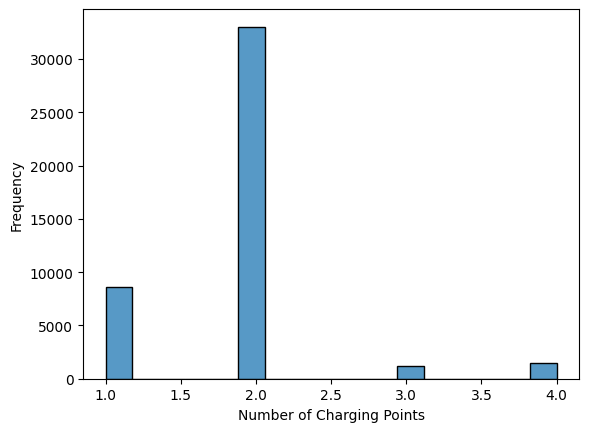

In [58]:
# Step 3: Exploratory Data Analysis
# Anzahl Ladepunkte: Number of charging points
sns.histplot(merged_df['Anzahl Ladepunkte'])
plt.xlabel('Number of Charging Points')
plt.ylabel('Frequency')
plt.show()


### What are the usage patterns of electric vehicle charging stations in Germany?

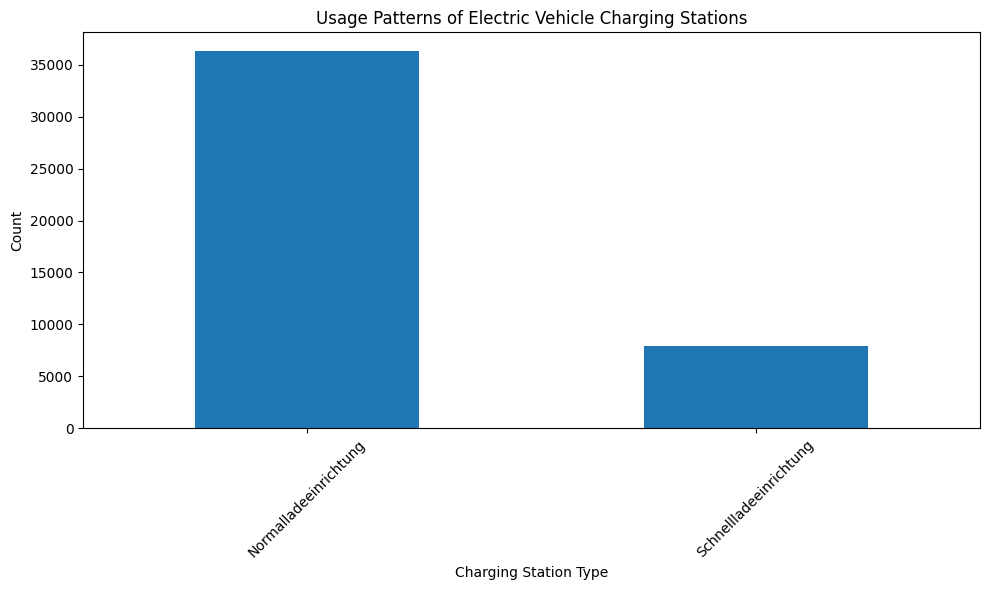

In [60]:
# Art der Ladeeinrichung: Type of charging device
usage_patterns = merged_df['Art der Ladeeinrichung'].value_counts()

# Normalladeeinrichtung: Normal charging device
# Schnellladeeinrichtung: Fast charger

plt.figure(figsize=(10, 6))
usage_patterns.plot(kind='bar')
plt.xlabel('Charging Station Type')
plt.ylabel('Count')
plt.title('Usage Patterns of Electric Vehicle Charging Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### How does the number of charging points and power capacity vary across different types of charging stations?

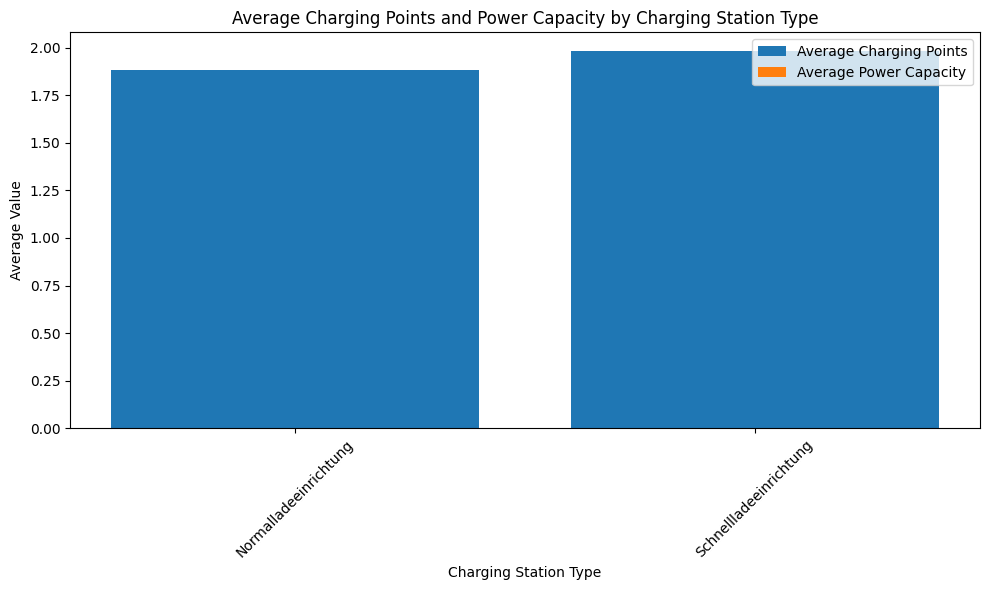

In [61]:
# anschlussleistung: connected load
charging_points_by_type = merged_df.groupby('Art der Ladeeinrichung')['Anzahl Ladepunkte'].mean()
power_capacity_by_type = merged_df.groupby('Art der Ladeeinrichung')['anschlussleistung'].mean()

# Ploting
plt.figure(figsize=(10, 6))
plt.bar(charging_points_by_type.index, charging_points_by_type.values, label='Average Charging Points')
plt.bar(power_capacity_by_type.index, power_capacity_by_type.values, label='Average Power Capacity')

plt.xlabel('Charging Station Type')
plt.ylabel('Average Value')
plt.title('Average Charging Points and Power Capacity by Charging Station Type')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Which areas in Germany have the highest concentration of charging stations, and which areas have limited coverage?

In [64]:
import plotly.io as pio
import plotly.graph_objects as go

# finding data
charging_station_counts = merged_df['Kreis/kreisfreie Stadt'].value_counts()
# specify the number of top areas
top_n = 50 
top_n_areas = charging_station_counts.head(top_n)

# create bar chart trace
bar_trace = go.Bar( x=top_n_areas.index, y=top_n_areas.values,)

# create layout
layout = go.Layout(
    title=f"Top {top_n} Areas with Highest Concentration of Charging Stations",
    xaxis=dict(title='Area'),
    yaxis=dict(title='Number of Charging Stations'),
)

# create figure and display the plot
fig = go.Figure(data=[bar_trace], layout=layout)
pio.show(fig)

In [65]:
# finding data
charging_station_counts = merged_df['Kreis/kreisfreie Stadt'].value_counts()
# specify the number of top areas
bottom_n = 50 
bottom_n_areas = charging_station_counts.tail(bottom_n)

# Create bar chart trace
bar_trace = go.Bar(x=bottom_n_areas.index, y=bottom_n_areas.values,)

# Create layout
layout = go.Layout(
    title=f"Top {bottom_n} Areas with Lowest Concentration of Charging Stations",
    xaxis=dict(title='Area'),
    yaxis=dict(title='Number of Charging Stations'),
)

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Render and display the plot
pio.show(fig)

### Are there specific types of charging stations that are more prevalent in certain regions or urban areas?

In [50]:
# charging station types by region
charging_station_types_by_region = merged_df.groupby('Kreis/kreisfreie Stadt')['Art der Ladeeinrichung'].value_counts()

# charging station types by region
charging_station_types_by_region = merged_df.groupby('Kreis/kreisfreie Stadt')['Art der Ladeeinrichung'].value_counts()

# finding unique charging station types
charging_station_types = merged_df['Art der Ladeeinrichung'].unique()

# list of regions
regions = merged_df['Kreis/kreisfreie Stadt'].unique()

# Create a dictionary to store the data for each charging station type
data = {}

for charging_station_type in charging_station_types:
    data[charging_station_type] = []
    
    for region in regions:
        if (region, charging_station_type) in charging_station_types_by_region:
            
            data[charging_station_type].append(charging_station_types_by_region[(region, charging_station_type)])
        else:
            data[charging_station_type].append(0)

# Create a stacked bar chart trace for each charging station type
bar_traces = []
for charging_station_type in charging_station_types:
    bar_trace = go.Bar(
        x=regions,
        y=data[charging_station_type],
        name=charging_station_type
    )
    bar_traces.append(bar_trace)

layout = go.Layout(
    title='Charging Station Types by Region',
    xaxis=dict(title='Region'),
    yaxis=dict(title='Number of Charging Stations'),
    barmode='stack'  # Display the bars in a stacked manner
)


fig = go.Figure(data=bar_traces, layout=layout)
pio.show(fig)


## Limitations and Conclusion

### Limitations
- The analysis is based on the available mentioned data sources, which may have limitations such as incomplete or outdated information. When interpreting the results, it is essential to consider the data quality and potential biases.
- It is worth noting that the dataset I used represents registered charging stations, and there may be unregistered or privately owned charging points that need to incorporate into the analysis. This could result in a potential underestimation of the overall charging infrastructure.
- The absence of population density data in the provided dataset limits exploring the relationship between charging station distribution and population density. This aspect could provide valuable insights into higher-demand areas and help prioritize charging infrastructure expansion.
- The analysis focuses on the current state of charging stations and usage patterns and does not provide future projections or predictions. Considering the dynamic nature of the electric vehicle market and evolving infrastructure needs is essential when planning for future developments.

### Conclusion
In conclusion, the analysis enlightens the usage patterns and distribution of electric vehicle charging stations in Germany. The findings are useful for policymakers, urban planners, and other stakeholders interested in promoting sustainable transportation. Furthermore, the investigation emphasizes the need for further expansion of the charging network, particularly in areas with limited coverage. Addressing this gap will be crucial to support the widespread adoption of electric vehicles and ensuring easy access to charging infrastructure. However, based on the available data and analysis, it is necessary to recognize the project's findings and recommendations.. To keep up with the evolving electric vehicle landscape and identify future opportunities for expansion and improvement, charging station data will need to be monitored and analyzed on an ongoing basis.